#Preparation of the environment 

Importing the libraries

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import re
import string
from google.colab import files
import seaborn as sns
import spacy
sns.set()

Uploading the csv file on the notebbook

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving groover_dataset_challenge.csv to groover_dataset_challenge.csv
User uploaded file "groover_dataset_challenge.csv" with length 3276492 bytes


Reading the csv and creating the dataset

In [ ]:
data=pd.read_csv('groover_dataset_challenge.csv')
data.head(10)

,Unnamed: 0,id,band_id,influencer_id,feedback,score
0,0,920636,24665,1642,"Bonjour Diogo Ramos,\n\n\nMerci pour le partag...",0.0
1,1,920637,24665,118,"Un message touchant, développé sur une onde mu...",0.0
2,2,920639,24665,226,Bonjour ! Merci beaucoup pour l'envoi ! On n'e...,0.0
3,3,920640,24665,1603,Bonjour. Merci pour cette fraîcheur et cet hym...,1.0
4,4,920641,24665,111,"Salut Diogo, alors c'est un peu éloigné de ce ...",1.0
5,5,920642,24665,2024,Bonjour\nMerci le titre est très frais! Mais m...,0.0
6,6,920643,24665,3113,Une chanson qui nous fait voyager dans des con...,0.0
7,7,920644,24665,2563,"Bonjour,\n\nExcellent morceau alliant la langu...",1.0
8,8,920646,24665,681,"c'est très agréable à écouter, et les mélodies...",0.0
9,9,920647,24665,1297,C'est vrai qu'est ce qu'on l'aime la liberté w...,1.0


In [ ]:
data=data.drop(columns="Unnamed: 0") #removing the first column since it's just the index

In [ ]:
data.head(10)

,id,band_id,influencer_id,feedback,score
0,920636,24665,1642,"Bonjour Diogo Ramos,\n\n\nMerci pour le partag...",0.0
1,920637,24665,118,"Un message touchant, développé sur une onde mu...",0.0
2,920639,24665,226,Bonjour ! Merci beaucoup pour l'envoi ! On n'e...,0.0
3,920640,24665,1603,Bonjour. Merci pour cette fraîcheur et cet hym...,1.0
4,920641,24665,111,"Salut Diogo, alors c'est un peu éloigné de ce ...",1.0
5,920642,24665,2024,Bonjour\nMerci le titre est très frais! Mais m...,0.0
6,920643,24665,3113,Une chanson qui nous fait voyager dans des con...,0.0
7,920644,24665,2563,"Bonjour,\n\nExcellent morceau alliant la langu...",1.0
8,920646,24665,681,"c'est très agréable à écouter, et les mélodies...",0.0
9,920647,24665,1297,C'est vrai qu'est ce qu'on l'aime la liberté w...,1.0


#General Statistics

Standard procedure to make sure that there aren't any values missing

In [ ]:
data.shape

(10000, 5)

In [ ]:
data.describe()

,id,band_id,influencer_id,score
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,926854.910400,23102.095500,1833.041600,0.268475
std,3932.233648,11313.591936,971.624905,0.414164
min,920636.000000,425.000000,102.000000,0.000000
25%,923560.750000,12979.000000,1081.000000,0.000000
50%,926461.500000,28611.000000,1896.000000,0.000000
75%,929746.250000,32990.000000,2587.000000,0.250000
max,936392.000000,34101.000000,3643.000000,1.000000


In [ ]:
data.feedback.describe()

count                                                 10000
unique                                                 8954
top       Bonjour, merci de m'avoir contacté. Votre morc...
freq                                                     33
Name: feedback, dtype: object

When I opened the file on excel, I noticed that the scores are either 0 , 0.25 ,  0.5 , 1. And now when I used the describe method, I noticed that 75% are under 0.25. Just to make sure.

In [ ]:
data.score.value_counts()

0.00    6401
1.00    2326
0.25    1111
0.50     162
Name: score, dtype: int64

As we see the score take 4 values. This could be useful in the machine learning part where we can conscider the problem as a classification problem (0=bad,0.25 or 0.5= average and 1= Great)

For now i'll conscider teh score as a float. Here's a boxplot that represents the values.

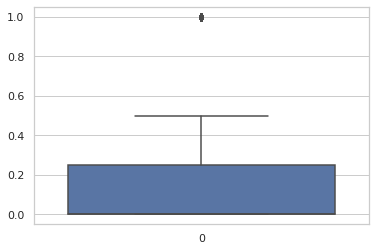

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(data=data.score);

The critics are pretty harsh! (more than half of the feedbacks are scored as 0)





Enough with the scores let's move to the the influencers and the bands

In [ ]:
data_band=data.groupby('band_id').agg({'feedback':'count', 'score': 'mean'})
data_band

,feedback,score
band_id,,
425,14,0.196429
455,1,1.000000
603,169,0.465976
788,2,0.000000
814,23,0.130435
...,...,...
34071,1,1.000000
34077,3,0.333333
34080,3,0.666667


We have feedbacks on 970 bands on this datasets.

It would be more usefull if this serie was sorted

In [ ]:
data_band=data_band.sort_values(by='feedback',ascending=False)
data_band

,feedback,score
band_id,,
603,169,0.465976
4942,168,0.319940
3949,156,0.209936
32787,134,0.335821
8046,127,0.269685
...,...,...
28653,1,1.000000
33533,1,1.000000
33546,1,1.000000


The bands with most numbers of feedbacks and their average scores.

Top 5 bands and their average score

In [ ]:
data_band[:5]

,feedback,score
band_id,,
603,169,0.465976
4942,168,0.319940
3949,156,0.209936
32787,134,0.335821
8046,127,0.269685


And now idem for infulencers

In [ ]:
data_inf=data.groupby('influencer_id').agg({'feedback':'count', 'score': 'mean'})
data_inf=data_inf.sort_values(by='feedback',ascending=False)

In [ ]:
data_inf[:5]

,feedback,score
influencer_id,,
3592,87,1.000000
385,81,0.000000
2064,81,0.271605
1821,69,0.108696
1675,69,0.014493


Now I noticed that the feedbacks are in different laguages. So knowing what laguages they are is interesting

In [ ]:
!pip install langdetect

     |████████████████████████████████| 983kB 5.5MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993194 sha256=36853b1274e0854db643727d8f66f866227ee4ce846cf298e5bd399dd9efd151
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
from langdetect import detect #needs to be installed if it's not 

In [ ]:
L=[]
for t in data.feedback:
  L.append(detect(t))
L=np.array(L)

In [ ]:
lang=pd.DataFrame(L,columns=['lang'])

In [ ]:
lang.value_counts()

lang
en      4836
fr      4704
it       335
pt        87
de        24
es        11
sv         3
dtype: int64

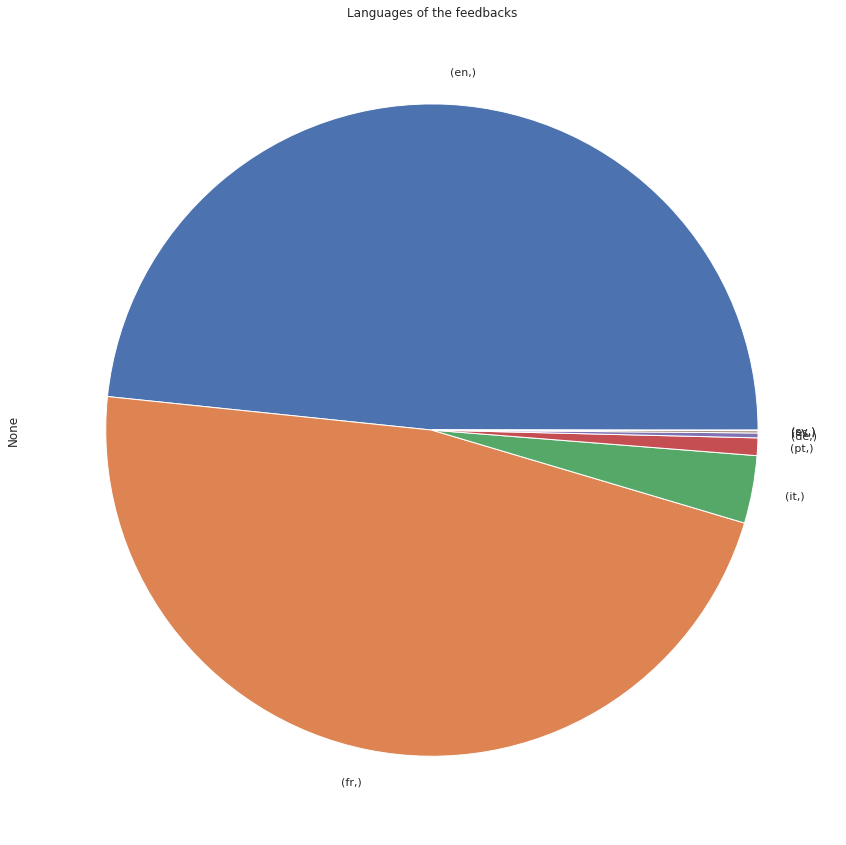

In [ ]:
plt.figure(figsize=(15,15))
plt.title('Languages of the feedbacks')
lang.value_counts().plot.pie()

So we have feedbacks in english, frensh, italian, portugese, deutsch, spanish and sweedish.  But most of them are either english or frensh.

Source: https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes

In [ ]:
data=data.join(lang)

Here I'm just making sure that the feedbacks are actually in said language

In [ ]:
data[data.lang=='sv']

,id,band_id,influencer_id,feedback,score,lang
1783,922730,12637,3459,"Hej Rebecca & Fiona, tack för er låt. Vi tycke...",1.0,sv
1812,922761,12637,2441,Grym låt! Gillade originalet och tycker att de...,1.0,sv
1814,922764,12637,1524,Grym prod! Skön blandning av klassisk piano ho...,1.0,sv


# Data preprocessing

The fact that the feedbacks come in different laguages adds more complexity to this problem.
To solve this problem we can use different approaches:
1.   Translate all the feedbacks to english and treat it as standard nlp problem: can be misleading because of syntactic differences between languages. (I'll use it in this problem)
2.   Use Multilangual NLP models like mBert (I never used it so it might take time to get the hang of it so i'll avoid this method for now)
3.   Treat each language separately: we can have bad results in some languages because we don't have enough data (for example sweedish).



### Traduction du feedback

In [ ]:
!pip install translate

     |████████████████████████████████| 194kB 9.8MB/s 
     |████████████████████████████████| 92kB 8.9MB/s 
     |████████████████████████████████| 102kB 9.6MB/s 
     |████████████████████████████████| 645kB 24.8MB/s 
     |████████████████████████████████| 7.2MB 29.8MB/s 
     |████████████████████████████████| 337kB 44.8MB/s 
ERROR: pytest 3.6.4 has requirement pluggy<0.8,>=0.5, but you'll have pluggy 0.13.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:
      Successfully uninstalled pluggy-0.7.1


This is a test run for the module

In [ ]:
from translate import Translator

In [ ]:
translator=Translator(to_lang='en',from_lang='fr')

In [ ]:
translation=translator.translate('Bonjour les amis')
translation

'Hello, everyone!'

In [ ]:
def trans_eng(text,lang):
  if lang=='en':
    return text
  else:
    return Translator(to_lang='en',from_lang=lang).translate(text)


In [ ]:
data.head()

,id,band_id,influencer_id,feedback,score,lang
0,920636,24665,1642,"Bonjour Diogo Ramos,\n\n\nMerci pour le partag...",0.0,fr
1,920637,24665,118,"Un message touchant, développé sur une onde mu...",0.0,fr
2,920639,24665,226,Bonjour ! Merci beaucoup pour l'envoi ! On n'e...,0.0,fr
3,920640,24665,1603,Bonjour. Merci pour cette fraîcheur et cet hym...,1.0,fr
4,920641,24665,111,"Salut Diogo, alors c'est un peu éloigné de ce ...",1.0,fr


In [ ]:
L=[]
for k in range(10000):
  row=data.iloc[k]
  L.append(trans_eng(row.feedback,row.lang))

In [ ]:
L

["Hello Diogo Ramos,\n\nThanks for sharing.\nCurrently the title does not correspond to our programming line.\n\nDon't hesitate to send us your next sounds.\n\nGood luck,\n\nAndré\nThe Lab",
 'A touching message, developed on a light musical wave full of oxygen. Music direction too folk, however, although endearing tracks result here and there during your record.',
 'Good morning! Thank you so much for sending it! We are not totally seduced by the song but next time maybe :)',
 'MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  17 HOURS 07 MINUTES 49 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE',
 'MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  17 HOURS 07 MINUTES 49 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE',
 'MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  17 HOURS 07 MINUTES 49 SECOND

I could'nt translate the whole dataset because i have a number of translations per day limited (Like seen in the shell above)(it would take more than a week to translate the whole thing). Also for some reason the google translation api didn't work.


From now on i'll only use the english feedbacks since all the feedbacks could be translated to english and so I can continue the challenge.

In [ ]:
data_eng=data[data.lang=='en']

In [ ]:
data_eng.head()

,id,band_id,influencer_id,feedback,score,lang
10,920648,24665,1406,Hello and thanks for sharing your music with u...,0.0,en
11,920649,24665,1644,"\nHello, we have listened to your track. Unfor...",0.0,en
12,920650,24665,3212,"Hi! I liked the song, it has a nice beat. The ...",0.0,en
14,920653,24665,1672,"Hi\n\nGood News ""Liberté je t'aime"" as been ad...",1.0,en
17,920656,24665,2417,"Hey, thanks for sending out. We’ll pass on tha...",0.0,en


In [ ]:
data_eng.shape

(4836, 6)

In [ ]:
data_eng=data_eng.drop(['id','band_id','influencer_id','lang'],axis=1)

### Cleaning of the dataset

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '',text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
data_eng.head()

,feedback,score
10,Hello and thanks for sharing your music with u...,0.0
11,"\nHello, we have listened to your track. Unfor...",0.0
12,"Hi! I liked the song, it has a nice beat. The ...",0.0
14,"Hi\n\nGood News ""Liberté je t'aime"" as been ad...",1.0
17,"Hey, thanks for sending out. We’ll pass on tha...",0.0


In [ ]:
data_eng['feedback'] = data['feedback'].apply(lambda x: clean_text(x))

In [ ]:
data_eng.head()

,feedback,score
10,hello and thanks for sharing your music with u...,0.0
11,hello we have listened to your track unfortuna...,0.0
12,hi i liked the song it has a nice beat the lyr...,0.0
14,higood news liberté je taime as been added to ...,1.0
17,hey thanks for sending out we’ll pass on that ...,0.0


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
def process(input_text):  #removing stop words
  stop_words = set(stopwords.words('english')) 
  word_tokens = word_tokenize(input_text) 
  output_text = [w for w in word_tokens if not w in stop_words] 
  output = ''
  for w in word_tokens: 
    if w not in stop_words: 
        output=output+' '+ w
  return output

In [ ]:
data_eng['feedback']=data_eng['feedback'].apply(process)

In [ ]:
data_eng.shape

(4836, 2)

In [ ]:
data_eng.head()

,feedback,score
10,hello thanks sharing music us honestly beauti...,0.0
11,hello listened track unfortunately crush good...,0.0
12,hi liked song nice beat lyrics also interesti...,0.0
14,higood news liberté je taime added playlist t...,1.0
17,hey thanks sending ’ pass one unfortunately r...,0.0


### Fitting into analysis

In this part, I plan to use a tfidf transformation then use the result to train  a neural network.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
corpus=data_eng.feedback
corpus

10       hello thanks sharing music us honestly beauti...
11       hello listened track unfortunately crush good...
12       hi liked song nice beat lyrics also interesti...
14       higood news liberté je taime added playlist t...
17       hey thanks sending ’ pass one unfortunately r...
                              ...                        
9994     hi ödethank much submitting musicgreat track ...
9995     hey guys thanks sharing great sound although ...
9996     hello md one thank track bombe ai certainly h...
9997     hi thanks sharing track really like song real...
9998     exceptionally produced electropop composition...
Name: feedback, Length: 4836, dtype: object

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vocab=vectorizer.get_feature_names()
X.shape

(4836, 10288)

In [ ]:
len(vocab)

10288

The dimension is too high, we can use a PCA (dimensionality reduction)

In [ ]:
D=X.todense()

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(3000)
pca.fit(D)
print(sum(pca.explained_variance_ratio_))

0.981970375728137


With 3000 variables we have more that 98% of the information
so we're only using 3000 variables

In [ ]:
def RN_trans(Y):
  L=[]
  for y in Y:
    if y==0:
      L.append([1,0,0,0])
    elif y==0.25:
      L.append([0,1,0,0])
    elif y==0.5:
      L.append([0,0,1,0])
    else:
      L.append([0,0,0,1])
  return L


In [ ]:
X=pca.transform(D)

In [ ]:
Y=RN_trans(np.array(data_eng['score']))

In [ ]:
Y

[[1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0,

In [ ]:
X_train[1].shape

(3000,)

And now we'll use classification (0,0.25,0.5 and 1 or consider the labels as floats)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
y_test=np.array(y_test)
y_train=np.array(y_train)

In [ ]:
X_train.shape

(3240, 3000)

In [ ]:
import keras
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation, Flatten,Softmax
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras import optimizers

In [ ]:
def Model():
  model=Sequential()
  model.add(keras.Input(shape=(3000,)))
  model.add(Dense(1500,activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(750,activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(4,activation='softmax'))
  adam = optimizers.Adam(lr = 0.001)
  model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer= adam,
                  metrics=['accuracy'])
  return model

In [ ]:
model=Model()

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1500)              4501500   
_________________________________________________________________
dropout_9 (Dropout)          (None, 1500)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 750)               1125750   
_________________________________________________________________
dropout_10 (Dropout)         (None, 750)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 3004      
Total params: 5,630,254
Trainable params: 5,630,254
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train.shape

(3240, 4)

In [ ]:
model.fit(X_train,y_train, validation_split=0.2 ,epochs=10, batch_size=128)

Epoch 1/10
21/21 [==============================] - 2s 98ms/step - loss: 0.0266 - accuracy: 0.9904 - val_loss: 0.6544 - val_accuracy: 0.8117
Epoch 2/10
21/21 [==============================] - 2s 95ms/step - loss: 0.0197 - accuracy: 0.9907 - val_loss: 0.6445 - val_accuracy: 0.8133
Epoch 3/10
21/21 [==============================] - 2s 95ms/step - loss: 0.0192 - accuracy: 0.9900 - val_loss: 0.6887 - val_accuracy: 0.8071
Epoch 4/10
21/21 [==============================] - 2s 94ms/step - loss: 0.0155 - accuracy: 0.9938 - val_loss: 0.6882 - val_accuracy: 0.8086
Epoch 5/10
21/21 [==============================] - 2s 93ms/step - loss: 0.0136 - accuracy: 0.9969 - val_loss: 0.7257 - val_accuracy: 0.8086
Epoch 6/10
21/21 [==============================] - 2s 93ms/step - loss: 0.0127 - accuracy: 0.9969 - val_loss: 0.7243 - val_accuracy: 0.8056
Epoch 7/10
21/21 [==============================] - 2s 94ms/step - loss: 0.0064 - accuracy: 0.9988 - val_loss: 0.7334 - val_accuracy: 0.8102
Epoch 8/10
21

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
13/13 [==============================] - 0s 31ms/step - loss: 0.6962 - accuracy: 0.8340
test loss, test acc: [0.6962292790412903, 0.8339598774909973]


The accuracy of the model on the te is pretty good 0.83 

It could get better with a larger dataset (Translate the whole dataset which would give us a dataset which is twice as big).
Make a neural network with more hidden layers.